In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
%matplotlib inline

Using TensorFlow backend.


In [44]:
# LSTM 臺大資訊大樓 (有雨)

monthOf2015 = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ntu = []
rain = []

count = 0
f1 = open('raindata.csv', 'r', encoding='utf8')
while True:
    line1 = f1.readline().strip()
    if line1 == '':
        break
    line1List = line1.split(',')
    if line1[-1] == 'T':
        for i in range(0, 24):
            rain.append(float(line1List[i+1]))
        count+=1
        f2 = open('day/' + str(line1[0:4]) + '.csv', 'r', encoding='utf8')
        while True:
            line2 = f2.readline().strip()
            if line2 == '':
                break
            line2List = line2.split(',')
            if line2List[0] == '臺大資訊大樓':
                for i in range(0, 24):
                    ntu.append(int(line2List[i+1]))
                break
        f2.close()
f1.close()
print(count)

95


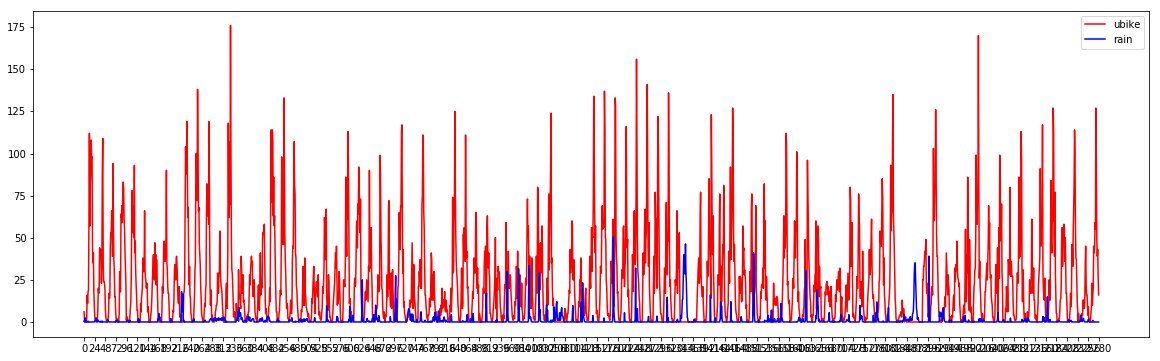

In [45]:
plt.figure(figsize=(20,6))
plt.xticks(range(0,2281,24))
plt.plot(ntu,'r',label='ubike')
plt.plot(rain,'b',label='rain')
plt.legend()

In [46]:
df_ubike = pd.DataFrame({'ubike':ntu})
print(df_ubike.describe())

df_rain = pd.DataFrame({'rain':rain})
print(df_rain.describe())

             ubike
count  2280.000000
mean     23.261842
std      26.791368
min       0.000000
25%       3.000000
50%      15.000000
75%      33.000000
max     176.000000
              rain
count  2280.000000
mean      1.080570
std       4.040805
min       0.000000
25%       0.000000
50%       0.000000
75%       0.500000
max      50.500000


In [47]:
sc = MinMaxScaler(feature_range=(-0.9, 0.9))
sc.fit(df_ubike)
df_ubike_std = sc.transform(df_ubike)

sc = MinMaxScaler(feature_range=(-0.9, 0.9))
sc.fit(df_rain)
df_rain_std = sc.transform(df_rain)

In [48]:
plt.figure(figsize=(20,6))
plt.xticks(range(0,2281,24))
plt.title('After Normalization')
plt.plot(df_ubike_std, label='ubike')
plt.plot(df_rain_std, label='rain')
plt.legend()

In [49]:
df_rnn1 = pd.DataFrame(columns=['Rain','X1','Y'])
df_rnn2 = pd.DataFrame(columns=['Rain','X1','X2','Y'])
df_rnn3 = pd.DataFrame(columns=['Rain','X1','X2','X3','Y'])
df_rnn4 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','Y'])
df_rnn5 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','X5','Y'])
df_rnn6 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','X5','X6','Y'])

for i in range(len(df_ubike)-1):
    df_rnn1.loc[i,'Rain'] = np.asscalar(df_rain_std[i])
    df_rnn1.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn1.loc[i,'Y'] = np.asscalar(df_ubike_std[i+1])

for i in range(len(df_ubike)-2):
    df_rnn2.loc[i,'Rain'] = np.asscalar(df_rain_std[i+1])
    df_rnn2.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn2.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn2.loc[i,'Y'] = np.asscalar(df_ubike_std[i+2])

for i in range(len(df_ubike)-3):
    df_rnn3.loc[i,'Rain'] = np.asscalar(df_rain_std[i+2])
    df_rnn3.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn3.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn3.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn3.loc[i,'Y'] = np.asscalar(df_ubike_std[i+3])

for i in range(len(df_ubike)-4):
    df_rnn4.loc[i,'Rain'] = np.asscalar(df_rain_std[i+3])
    df_rnn4.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn4.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn4.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn4.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn4.loc[i,'Y'] = np.asscalar(df_ubike_std[i+4])

for i in range(len(df_ubike)-5):
    df_rnn5.loc[i,'Rain'] = np.asscalar(df_rain_std[i+4])
    df_rnn5.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn5.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn5.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn5.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn5.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn5.loc[i,'Y'] = np.asscalar(df_ubike_std[i+5])

for i in range(len(df_ubike)-6):
    df_rnn6.loc[i,'Rain'] = np.asscalar(df_rain_std[i+5])
    df_rnn6.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn6.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn6.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn6.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn6.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn6.loc[i,'X6'] = np.asscalar(df_ubike_std[i+5])
    df_rnn6.loc[i,'Y'] = np.asscalar(df_ubike_std[i+6])

df_list = [df_rnn1,df_rnn2,df_rnn3,df_rnn4,df_rnn5,df_rnn6]

(2279, 2, 1)
2279/2279 [==============================] - 1s 372us/step
(455,)


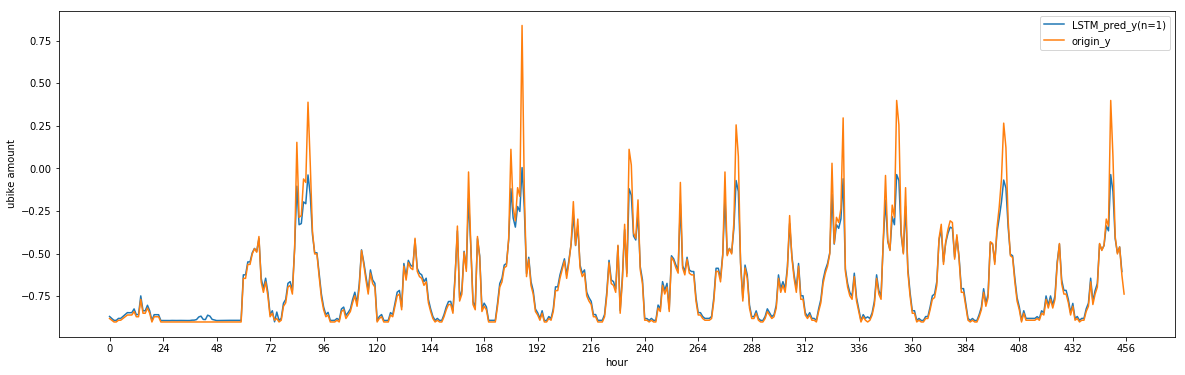

None
(2278, 3, 1)
2278/2278 [==============================] - 1s 387us/step
(454,)


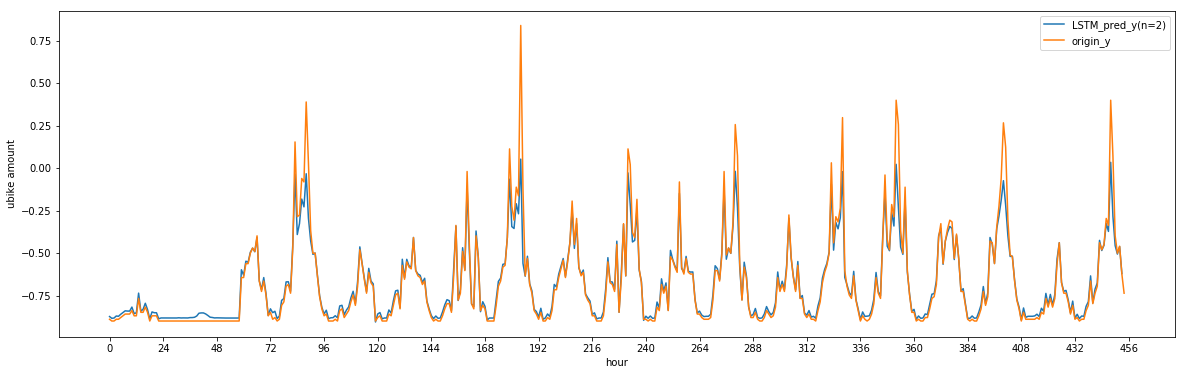

None
(2277, 4, 1)
2277/2277 [==============================] - 1s 435us/step
(453,)


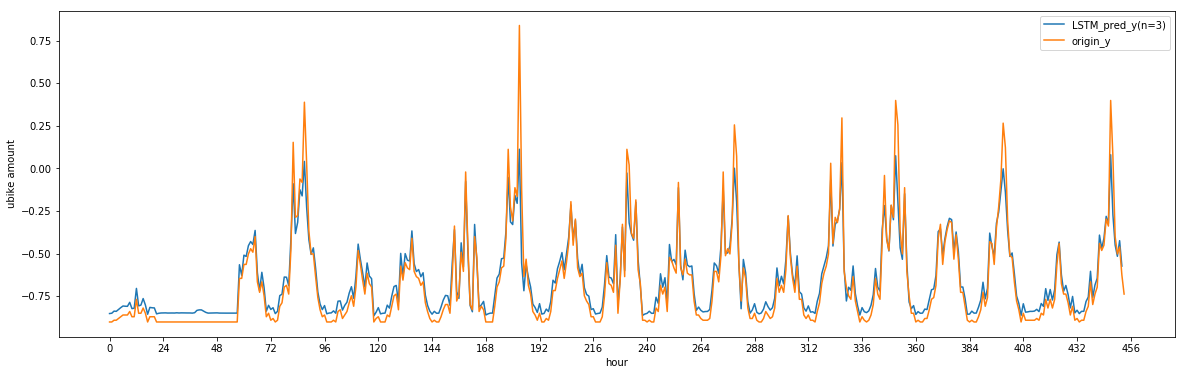

None
(2276, 5, 1)
2276/2276 [==============================] - 1s 440us/step
(452,)


None
(2275, 6, 1)
2275/2275 [==============================] - 1s 425us/step
(451,)


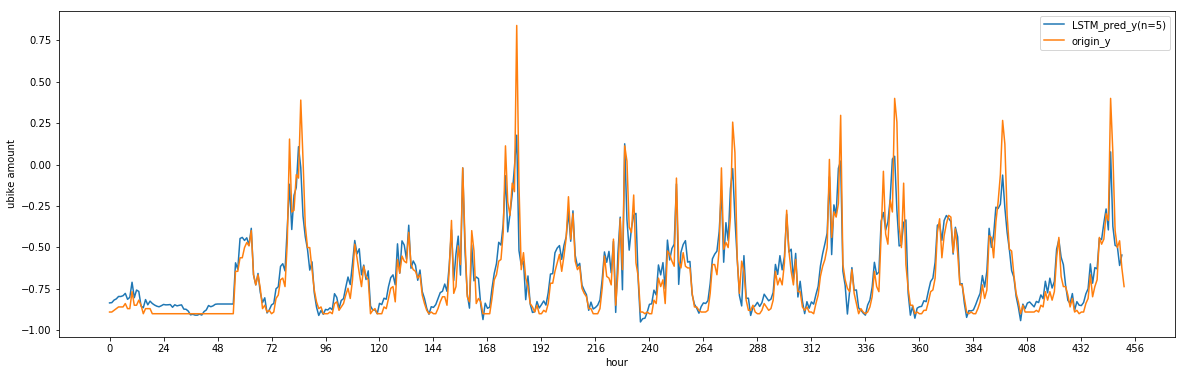

None
(2274, 7, 1)
2274/2274 [==============================] - 1s 486us/step
(450,)


None


In [50]:
with_inputrain_mse_list = []
with_inputrain_y_pred_list = []
name_count = 0
for i in df_list:
    name_count+=1
    temp = []
    for j in i:
        temp.append(j)
    temp.pop(-1)

    X_rnn = np.array(i[temp]).reshape(len(i), len(temp), 1)
    y_rnn = np.array(i.Y).reshape(len(i), 1)
    
    print(X_rnn.shape)
    
    model = Sequential()
    model.add(LSTM(units=20, input_shape=(None,1)))
    model.add(Dense(1))
    model.load_weights('new version/with_rain_input_model_' + str(name_count) + '_rain_day.h5')
    model.compile(loss='mse', optimizer='adam')
    mse = model.evaluate(X_rnn,y_rnn) # X_rnn[1824:],y_rnn[1824:]
    with_inputrain_mse_list.append(mse)
    y_pred_lstm = model.predict(X_rnn[1824:]).reshape(-1)
    with_inputrain_y_pred_list.append(y_pred_lstm)
    print(y_pred_lstm.shape)
    plt.figure(figsize=(20,6))
    plt.xticks(range(0,457,24))
    plt.xlabel('hour')
    plt.ylabel('ubike amount')
    plt.plot(y_pred_lstm, label='LSTM_pred_y(n=' + str(name_count) + ')')
    plt.plot(y_rnn[1823:], label='origin_y')
    plt.legend()
    print(plt.show())
    

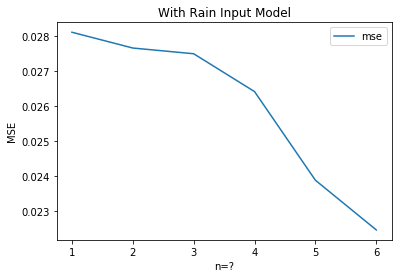

In [51]:
plt.plot(range(1,7),with_inputrain_mse_list,label='mse')
plt.xlabel('n=?')
plt.ylabel('MSE')
plt.legend()
plt.title('With Rain Input Model')

In [52]:
df_rnn1 = pd.DataFrame(columns=['X1','Y'])
df_rnn2 = pd.DataFrame(columns=['X1','X2','Y'])
df_rnn3 = pd.DataFrame(columns=['X1','X2','X3','Y'])
df_rnn4 = pd.DataFrame(columns=['X1','X2','X3','X4','Y'])
df_rnn5 = pd.DataFrame(columns=['X1','X2','X3','X4','X5','Y'])
df_rnn6 = pd.DataFrame(columns=['X1','X2','X3','X4','X5','X6','Y'])

for i in range(len(df_ubike)-1):
    df_rnn1.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn1.loc[i,'Y'] = np.asscalar(df_ubike_std[i+1])

for i in range(len(df_ubike)-2):
    df_rnn2.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn2.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn2.loc[i,'Y'] = np.asscalar(df_ubike_std[i+2])

for i in range(len(df_ubike)-3):
    df_rnn3.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn3.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn3.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn3.loc[i,'Y'] = np.asscalar(df_ubike_std[i+3])

for i in range(len(df_ubike)-4):
    df_rnn4.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn4.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn4.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn4.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn4.loc[i,'Y'] = np.asscalar(df_ubike_std[i+4])

for i in range(len(df_ubike)-5):
    df_rnn5.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn5.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn5.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn5.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn5.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn5.loc[i,'Y'] = np.asscalar(df_ubike_std[i+5])

for i in range(len(df_ubike)-6):
    df_rnn6.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn6.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn6.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn6.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn6.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn6.loc[i,'X6'] = np.asscalar(df_ubike_std[i+5])
    df_rnn6.loc[i,'Y'] = np.asscalar(df_ubike_std[i+6])
    
df_list = [df_rnn1,df_rnn2,df_rnn3,df_rnn4,df_rnn5,df_rnn6]

(2279, 1, 1)
2279/2279 [==============================] - 1s 413us/step
(455,)


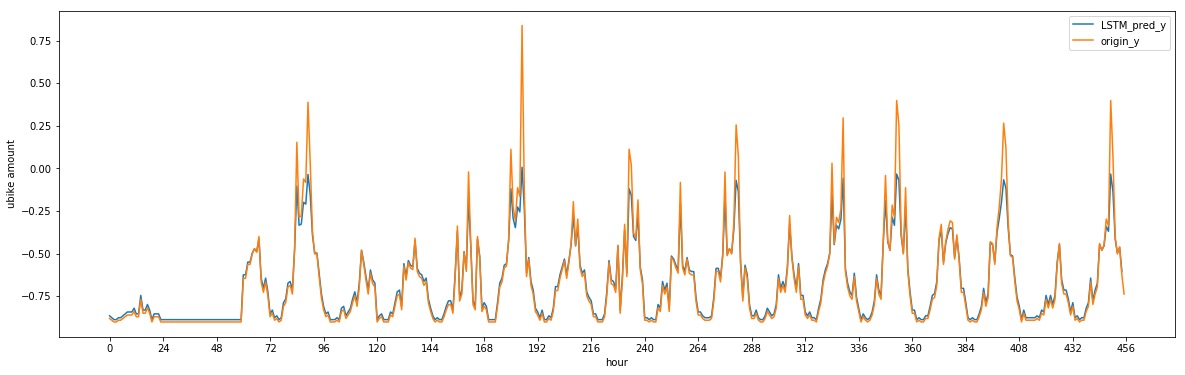

None
(2278, 2, 1)
2278/2278 [==============================] - 1s 420us/step
(454,)


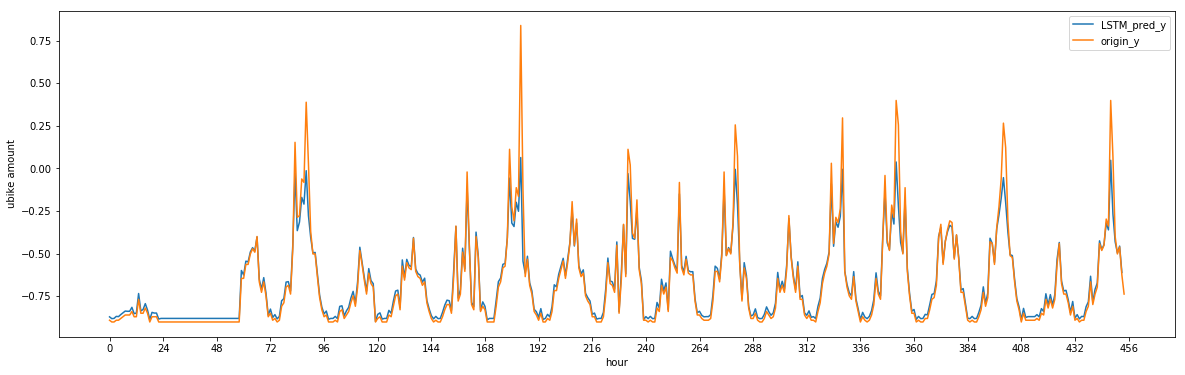

None
(2277, 3, 1)
2277/2277 [==============================] - 1s 451us/step
(453,)


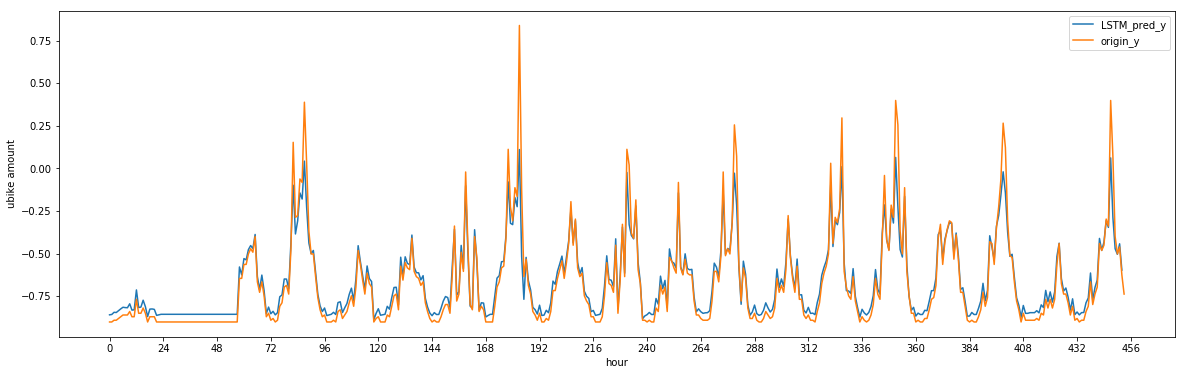

None
(2276, 4, 1)
2276/2276 [==============================] - 1s 463us/step
(452,)


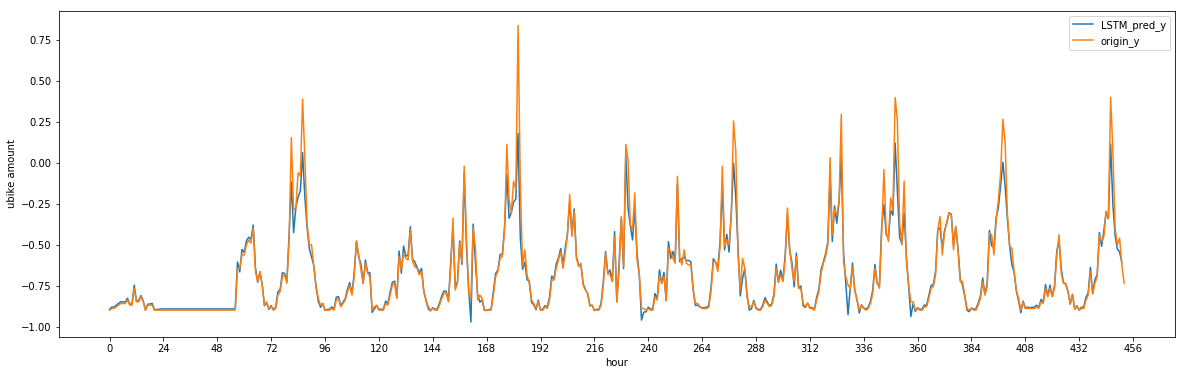

None
(2275, 5, 1)
2275/2275 [==============================] - 1s 464us/step
(451,)


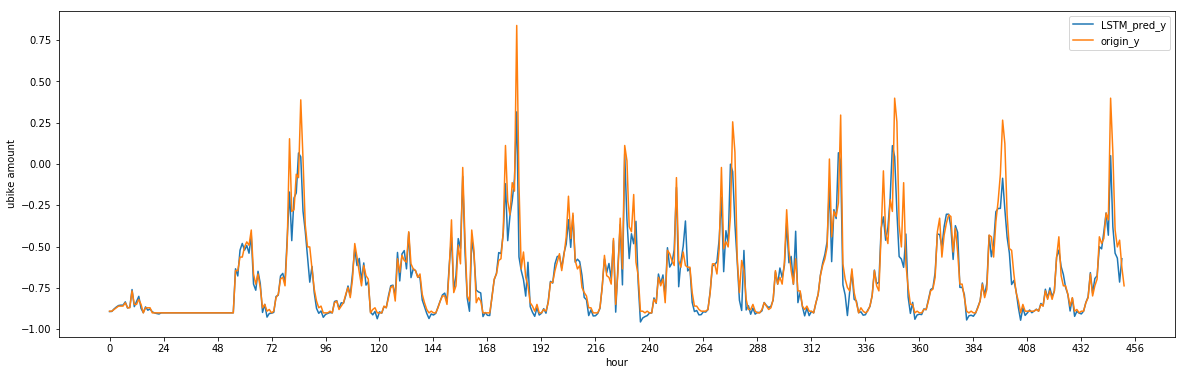

None
(2274, 6, 1)
2274/2274 [==============================] - 1s 532us/step
(450,)


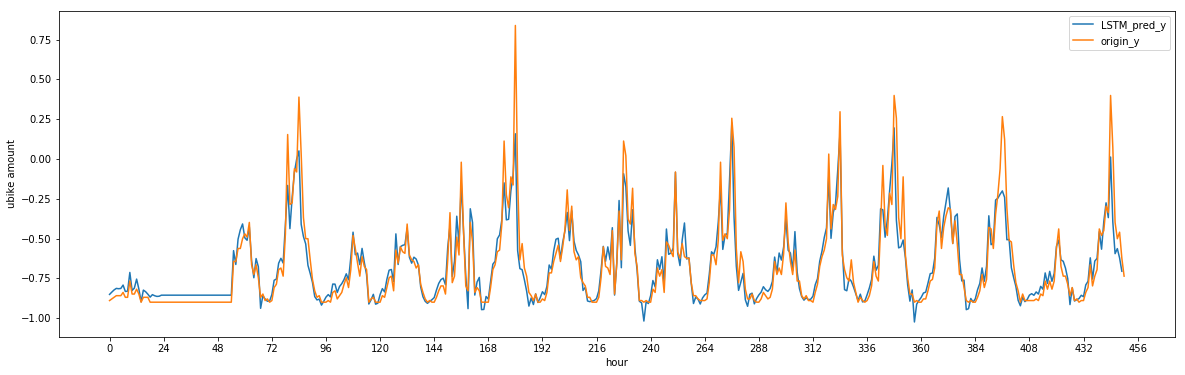

None


In [53]:
without_inputrain_mse_list = []
without_inputrain_y_pred_list = []
name_count = 0
for i in df_list:
    name_count+=1
    temp = []
    for j in i:
        temp.append(j)
    temp.pop(-1)

    X_rnn = np.array(i[temp]).reshape(len(i), len(temp), 1)
    y_rnn = np.array(i.Y).reshape(len(i), 1)
    
    print(X_rnn.shape)
    
    model = Sequential()
    model.add(LSTM(units=20, input_shape=(None,1)))
    model.add(Dense(1))
    model.load_weights('new version/no_rain_input_model_' + str(name_count) + '_rain_day.h5')
    model.compile(loss='mse', optimizer='adam')
    mse = model.evaluate(X_rnn,y_rnn) # X_rnn[1824:],y_rnn[1824:]
    without_inputrain_mse_list.append(mse)
    y_pred_lstm = model.predict(X_rnn[1824:]).reshape(-1)
    without_inputrain_y_pred_list.append(y_pred_lstm)
    print(y_pred_lstm.shape)
    plt.figure(figsize=(20,6))
    plt.xticks(range(0,457,24))
    plt.xlabel('hour')
    plt.ylabel('ubike amount')
    plt.plot(y_pred_lstm, label='LSTM_pred_y')
    plt.plot(y_rnn[1823:], label='origin_y')
    plt.legend()
    print(plt.show())

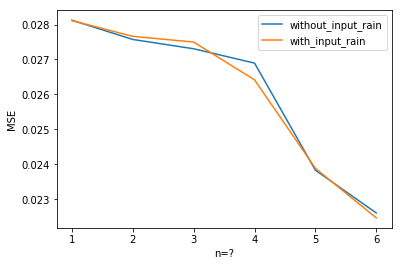

In [54]:
plt.plot(range(1,7),without_inputrain_mse_list,label='without_input_rain')
plt.plot(range(1,7),with_inputrain_mse_list,label='with_input_rain')
plt.xlabel('n=?')
plt.ylabel('MSE')
plt.legend()

In [2]:
# LSTM 臺大資訊大樓 (沒雨)

monthOf2015 = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ntu = []
rain = []

count = 0
f1 = open('raindata.csv', 'r', encoding='utf8')
while True:
    line1 = f1.readline().strip()
    if line1 == '':
        break
    line1List = line1.split(',')
    if line1[-1] == 'F':
        for i in range(0, 24):
            rain.append(float(line1List[i+1]))
        count+=1
        f2 = open('day/' + str(line1[0:4]) + '.csv', 'r', encoding='utf8')
        while True:
            line2 = f2.readline().strip()
            if line2 == '':
                break
            line2List = line2.split(',')
            if line2List[0] == '臺大資訊大樓':
                for i in range(0, 24):
                    ntu.append(int(line2List[i+1]))
                break
        f2.close()
f1.close()
print(count)

269


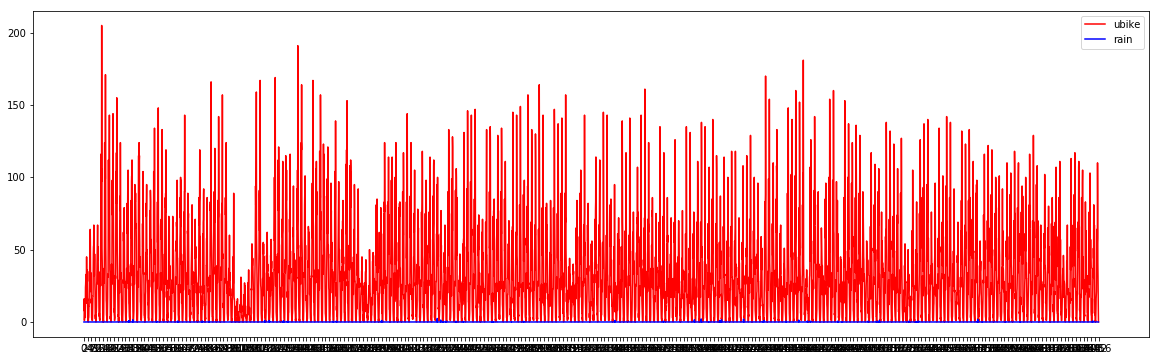

In [5]:
plt.figure(figsize=(20,6))
plt.xticks(range(0,6457,24))
plt.plot(ntu,'r',label='ubike')
plt.plot(rain,'b',label='rain')
plt.legend()

In [6]:
df_ubike = pd.DataFrame({'ubike':ntu})
print(df_ubike.describe())

df_rain = pd.DataFrame({'rain':rain})
print(df_rain.describe())

             ubike
count  6456.000000
mean     32.342472
std      31.464708
min       0.000000
25%       5.000000
50%      25.000000
75%      49.000000
max     205.000000
              rain
count  6456.000000
mean      0.008597
std       0.087031
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.400000


In [7]:
sc = MinMaxScaler(feature_range=(-0.9, 0.9))
sc.fit(df_ubike)
df_ubike_std = sc.transform(df_ubike)

sc = MinMaxScaler(feature_range=(-0.9, 0.9))
sc.fit(df_rain)
df_rain_std = sc.transform(df_rain)

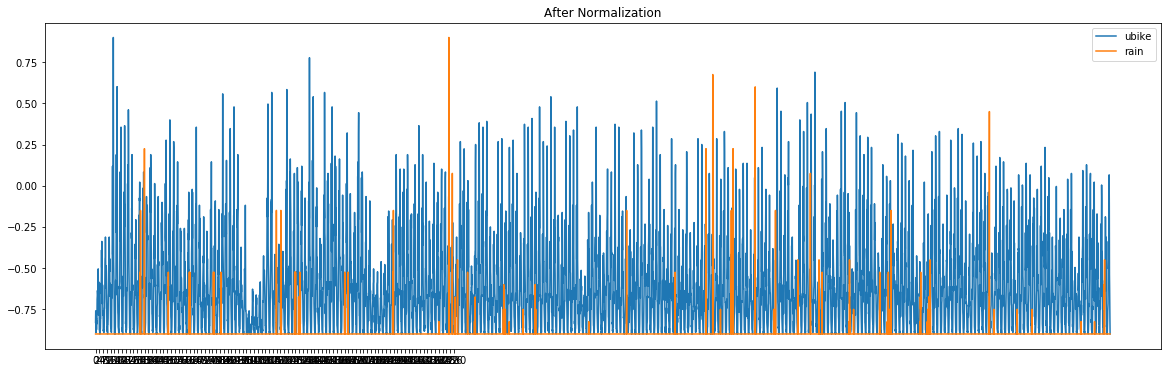

In [8]:
plt.figure(figsize=(20,6))
plt.xticks(range(0,2281,24))
plt.title('After Normalization')
plt.plot(df_ubike_std, label='ubike')
plt.plot(df_rain_std, label='rain')
plt.legend()

In [9]:
df_rnn1 = pd.DataFrame(columns=['Rain','X1','Y'])
df_rnn2 = pd.DataFrame(columns=['Rain','X1','X2','Y'])
df_rnn3 = pd.DataFrame(columns=['Rain','X1','X2','X3','Y'])
df_rnn4 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','Y'])
df_rnn5 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','X5','Y'])
df_rnn6 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','X5','X6','Y'])

for i in range(len(df_ubike)-1):
    df_rnn1.loc[i,'Rain'] = np.asscalar(df_rain_std[i])
    df_rnn1.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn1.loc[i,'Y'] = np.asscalar(df_ubike_std[i+1])

for i in range(len(df_ubike)-2):
    df_rnn2.loc[i,'Rain'] = np.asscalar(df_rain_std[i+1])
    df_rnn2.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn2.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn2.loc[i,'Y'] = np.asscalar(df_ubike_std[i+2])

for i in range(len(df_ubike)-3):
    df_rnn3.loc[i,'Rain'] = np.asscalar(df_rain_std[i+2])
    df_rnn3.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn3.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn3.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn3.loc[i,'Y'] = np.asscalar(df_ubike_std[i+3])

for i in range(len(df_ubike)-4):
    df_rnn4.loc[i,'Rain'] = np.asscalar(df_rain_std[i+3])
    df_rnn4.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn4.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn4.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn4.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn4.loc[i,'Y'] = np.asscalar(df_ubike_std[i+4])

for i in range(len(df_ubike)-5):
    df_rnn5.loc[i,'Rain'] = np.asscalar(df_rain_std[i+4])
    df_rnn5.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn5.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn5.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn5.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn5.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn5.loc[i,'Y'] = np.asscalar(df_ubike_std[i+5])

for i in range(len(df_ubike)-6):
    df_rnn6.loc[i,'Rain'] = np.asscalar(df_rain_std[i+5])
    df_rnn6.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn6.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn6.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn6.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn6.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn6.loc[i,'X6'] = np.asscalar(df_ubike_std[i+5])
    df_rnn6.loc[i,'Y'] = np.asscalar(df_ubike_std[i+6])

df_list = [df_rnn1,df_rnn2,df_rnn3,df_rnn4,df_rnn5,df_rnn6]

(6455, 2, 1)
1295/1295 [==============================] - 1s 407us/step
(1295,)


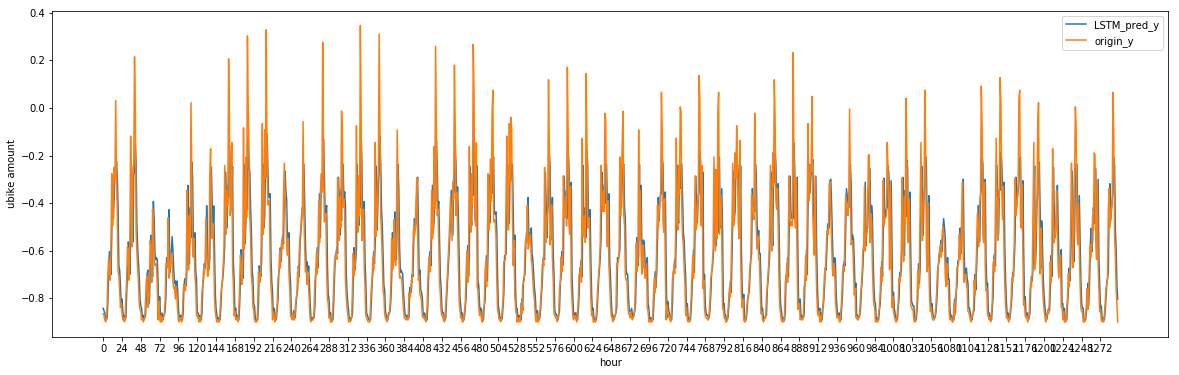

None
(6454, 3, 1)
1294/1294 [==============================] - 1s 415us/step
(1294,)


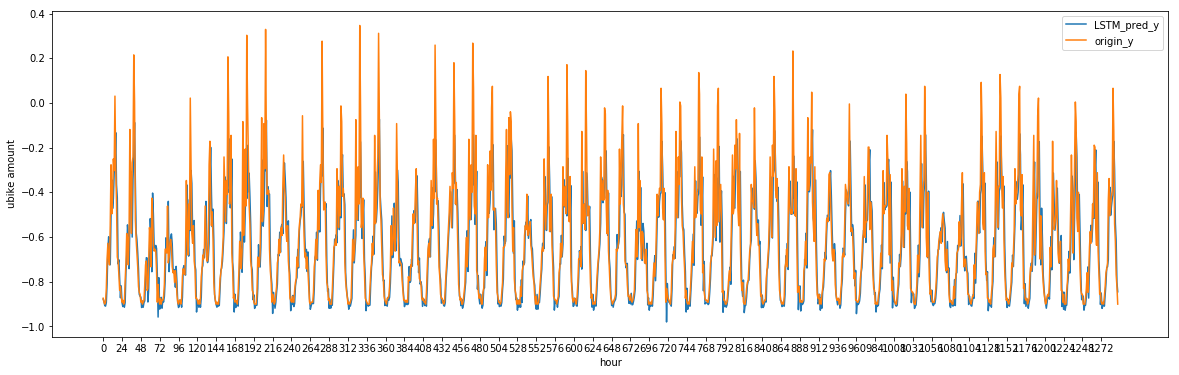

None
(6453, 4, 1)
1293/1293 [==============================] - 1s 424us/step
(1293,)


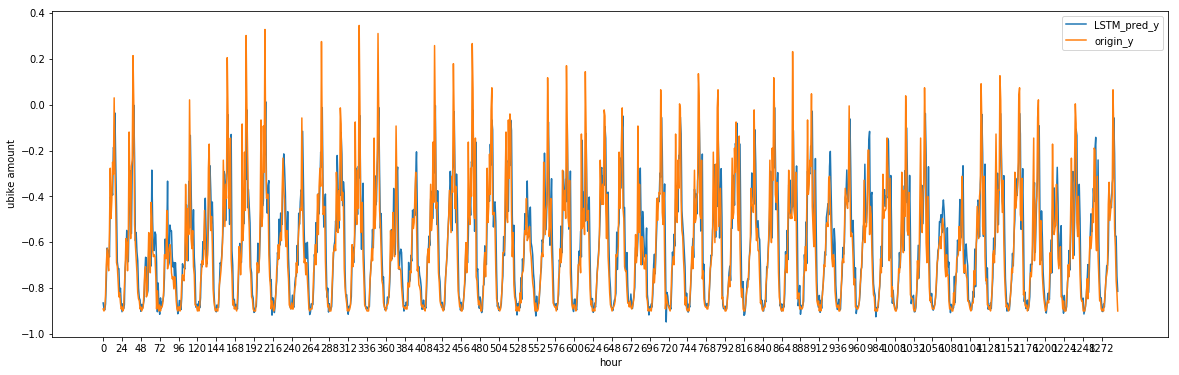

None
(6452, 5, 1)
1292/1292 [==============================] - 1s 436us/step
(1292,)


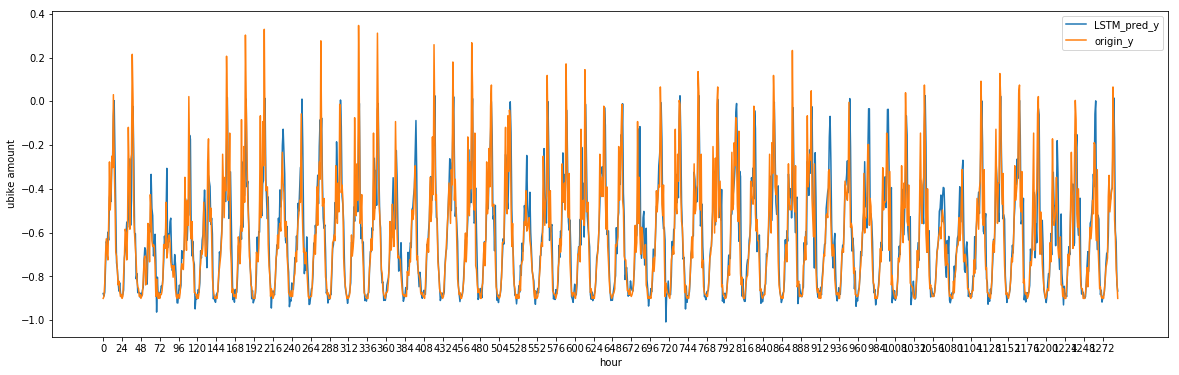

None
(6451, 6, 1)
1291/1291 [==============================] - 1s 471us/step
(1291,)


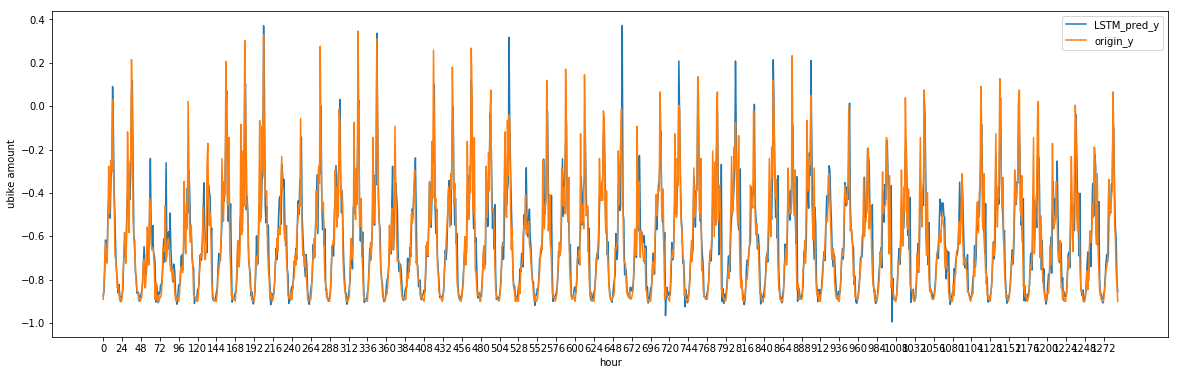

None
(6450, 7, 1)
1290/1290 [==============================] - 1s 517us/step
(1290,)


None


In [18]:
with_inputrain_mse_list = []
with_inputrain_y_pred_list = []
name_count = 0
for i in df_list:
    name_count+=1
    temp = []
    for j in i:
        temp.append(j)
    temp.pop(-1)

    X_rnn = np.array(i[temp]).reshape(len(i), len(temp), 1)
    y_rnn = np.array(i.Y).reshape(len(i), 1)
    
    print(X_rnn.shape)
    
    model = Sequential()
    model.add(LSTM(units=20, input_shape=(None,1)))
    model.add(Dense(1))
    model.load_weights('new version/with_rain_input_model_' + str(name_count) + '_no_rain_day.h5')
    model.compile(loss='mse', optimizer='adam')
    mse = model.evaluate(X_rnn[5160:],y_rnn[5160:])
    with_inputrain_mse_list.append(mse)
    y_pred_lstm = model.predict(X_rnn[5160:]).reshape(-1)
    with_inputrain_y_pred_list.append(y_pred_lstm)
    print(y_pred_lstm.shape)
    plt.figure(figsize=(20,6))
    plt.xticks(range(0,1297,24))
    plt.xlabel('hour')
    plt.ylabel('ubike amount')
    plt.plot(y_pred_lstm, label='LSTM_pred_y')
    plt.plot(y_rnn[5160:], label='origin_y')
    plt.legend()
    print(plt.show())
    

In [19]:
plt.plot(range(1,7),with_inputrain_mse_list,label='mse')
plt.xlabel('n=?')
plt.ylabel('MSE')
plt.legend()
plt.title('With Rain Input Model')

In [20]:
df_rnn1 = pd.DataFrame(columns=['X1','Y'])
df_rnn2 = pd.DataFrame(columns=['X1','X2','Y'])
df_rnn3 = pd.DataFrame(columns=['X1','X2','X3','Y'])
df_rnn4 = pd.DataFrame(columns=['X1','X2','X3','X4','Y'])
df_rnn5 = pd.DataFrame(columns=['X1','X2','X3','X4','X5','Y'])
df_rnn6 = pd.DataFrame(columns=['X1','X2','X3','X4','X5','X6','Y'])

for i in range(len(df_ubike)-1):
    df_rnn1.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn1.loc[i,'Y'] = np.asscalar(df_ubike_std[i+1])

for i in range(len(df_ubike)-2):
    df_rnn2.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn2.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn2.loc[i,'Y'] = np.asscalar(df_ubike_std[i+2])

for i in range(len(df_ubike)-3):
    df_rnn3.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn3.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn3.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn3.loc[i,'Y'] = np.asscalar(df_ubike_std[i+3])

for i in range(len(df_ubike)-4):
    df_rnn4.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn4.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn4.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn4.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn4.loc[i,'Y'] = np.asscalar(df_ubike_std[i+4])

for i in range(len(df_ubike)-5):
    df_rnn5.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn5.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn5.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn5.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn5.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn5.loc[i,'Y'] = np.asscalar(df_ubike_std[i+5])

for i in range(len(df_ubike)-6):
    df_rnn6.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn6.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn6.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn6.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn6.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn6.loc[i,'X6'] = np.asscalar(df_ubike_std[i+5])
    df_rnn6.loc[i,'Y'] = np.asscalar(df_ubike_std[i+6])
    
df_list = [df_rnn1,df_rnn2,df_rnn3,df_rnn4,df_rnn5,df_rnn6]

(6455, 1, 1)
1295/1295 [==============================] - 1s 610us/step
(1295,)


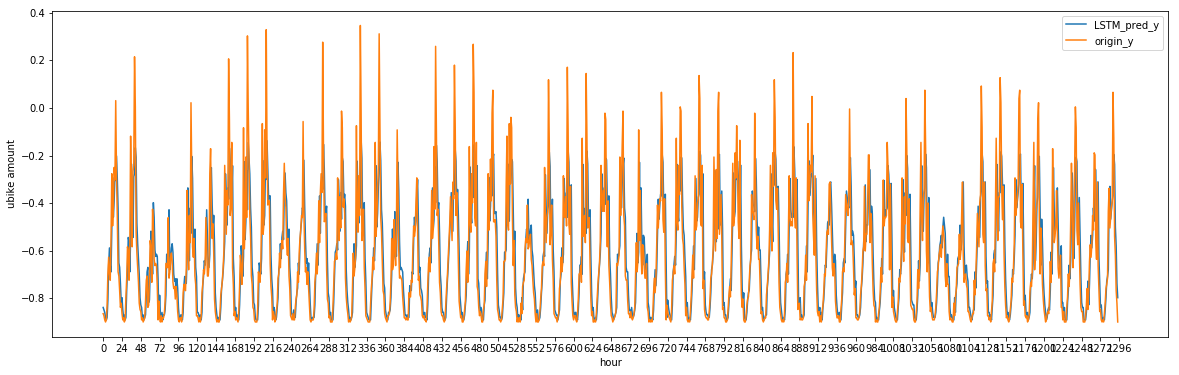

None
(6454, 2, 1)
1294/1294 [==============================] - 1s 615us/step
(1294,)


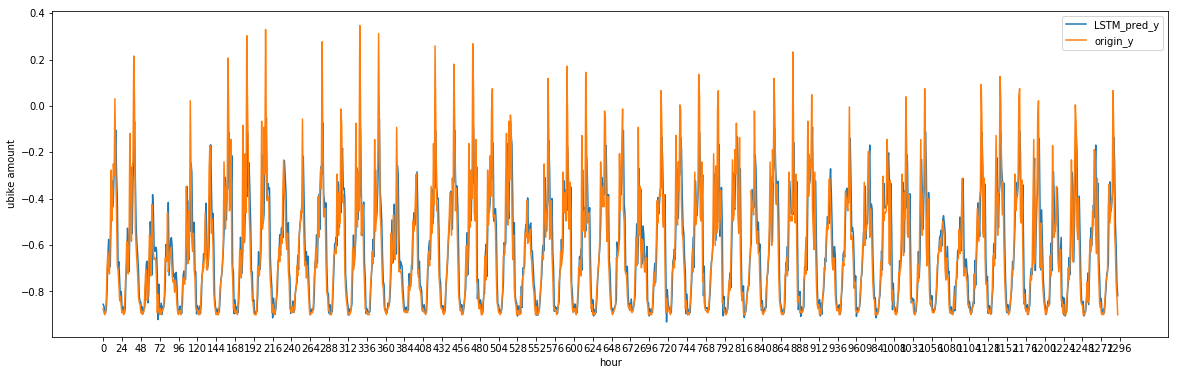

None
(6453, 3, 1)
1293/1293 [==============================] - 1s 655us/step
(1293,)


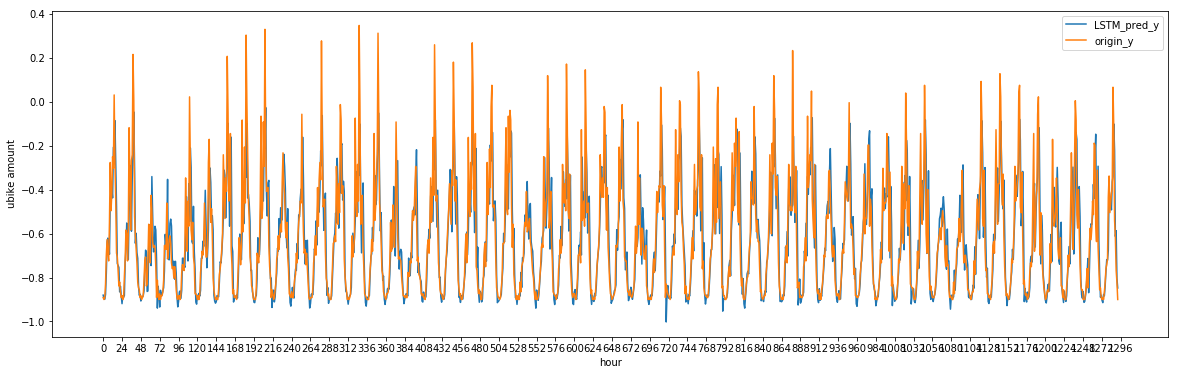

None
(6452, 4, 1)
1292/1292 [==============================] - 1s 734us/step
(1292,)


None
(6451, 5, 1)
1291/1291 [==============================] - 1s 732us/step
(1291,)


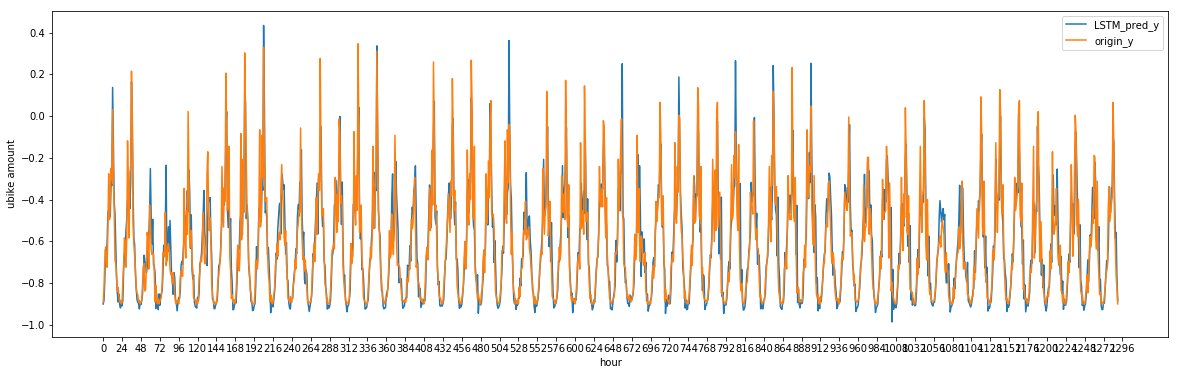

None
(6450, 6, 1)
1290/1290 [==============================] - 1s 804us/step
(1290,)


None


In [23]:
without_inputrain_mse_list = []
without_inputrain_y_pred_list = []
name_count = 0
for i in df_list:
    name_count+=1
    temp = []
    for j in i:
        temp.append(j)
    temp.pop(-1)

    X_rnn = np.array(i[temp]).reshape(len(i), len(temp), 1)
    y_rnn = np.array(i.Y).reshape(len(i), 1)
    
    print(X_rnn.shape)
    
    model = Sequential()
    model.add(LSTM(units=20, input_shape=(None,1)))
    model.add(Dense(1))
    model.load_weights('new version/no_rain_input_model_' + str(name_count) + '_no_rain_day.h5')
    model.compile(loss='mse', optimizer='adam')
    mse = model.evaluate(X_rnn[5160:],y_rnn[5160:])
    without_inputrain_mse_list.append(mse)
    y_pred_lstm = model.predict(X_rnn[5160:]).reshape(-1)
    without_inputrain_y_pred_list.append(y_pred_lstm)
    print(y_pred_lstm.shape)
    plt.figure(figsize=(20,6))
    plt.xticks(range(0,1297,24))
    plt.xlabel('hour')
    plt.ylabel('ubike amount')
    plt.plot(y_pred_lstm, label='LSTM_pred_y')
    plt.plot(y_rnn[5160:], label='origin_y')
    plt.legend()
    print(plt.show())

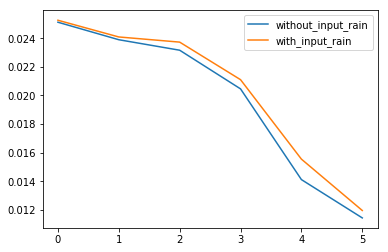

In [24]:
plt.plot(range(1,7),without_inputrain_mse_list,label='without_input_rain')
plt.plot(range(1,7),with_inputrain_mse_list,label='with_input_rain')
plt.xlabel('n=?')
plt.ylabel('MSE')
plt.legend()

In [25]:
# LSTM 臺大資訊大樓 (全)

monthOf2015 = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ntu = []
rain = []

count = 0
f1 = open('raindata.csv', 'r', encoding='utf8')
while True:
    line1 = f1.readline().strip()
    if line1 == '':
        break
    line1List = line1.split(',')
    for i in range(0, 24):
        rain.append(float(line1List[i+1]))
    count+=1
    f2 = open('day/' + str(line1[0:4]) + '.csv', 'r', encoding='utf8')
    while True:
        line2 = f2.readline().strip()
        if line2 == '':
            break
        line2List = line2.split(',')
        if line2List[0] == '臺大資訊大樓':
            for i in range(0, 24):
                ntu.append(int(line2List[i+1]))
            break
    f2.close()
f1.close()
print(count)

364


In [26]:
plt.figure(figsize=(20,6))
plt.xticks(range(0,8736,24))
plt.plot(ntu,'r',label='ubike')
plt.plot(rain,'b',label='rain')
plt.legend()

In [27]:
df_ubike = pd.DataFrame({'ubike':ntu})
print(df_ubike.describe())

df_rain = pd.DataFrame({'rain':rain})
print(df_rain.describe())

             ubike
count  8736.000000
mean     29.972527
std      30.574318
min       0.000000
25%       5.000000
50%      22.000000
75%      46.000000
max     205.000000
              rain
count  8736.000000
mean      0.288370
std       2.118333
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      50.500000


In [28]:
sc = MinMaxScaler(feature_range=(-0.9, 0.9))
sc.fit(df_ubike)
df_ubike_std = sc.transform(df_ubike)

sc = MinMaxScaler(feature_range=(-0.9, 0.9))
sc.fit(df_rain)
df_rain_std = sc.transform(df_rain)

In [29]:
df_rnn1 = pd.DataFrame(columns=['Rain','X1','Y'])
df_rnn2 = pd.DataFrame(columns=['Rain','X1','X2','Y'])
df_rnn3 = pd.DataFrame(columns=['Rain','X1','X2','X3','Y'])
df_rnn4 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','Y'])
df_rnn5 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','X5','Y'])
df_rnn6 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','X5','X6','Y'])

for i in range(len(df_ubike)-1):
    df_rnn1.loc[i,'Rain'] = np.asscalar(df_rain_std[i])
    df_rnn1.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn1.loc[i,'Y'] = np.asscalar(df_ubike_std[i+1])

for i in range(len(df_ubike)-2):
    df_rnn2.loc[i,'Rain'] = np.asscalar(df_rain_std[i+1])
    df_rnn2.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn2.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn2.loc[i,'Y'] = np.asscalar(df_ubike_std[i+2])

for i in range(len(df_ubike)-3):
    df_rnn3.loc[i,'Rain'] = np.asscalar(df_rain_std[i+2])
    df_rnn3.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn3.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn3.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn3.loc[i,'Y'] = np.asscalar(df_ubike_std[i+3])

for i in range(len(df_ubike)-4):
    df_rnn4.loc[i,'Rain'] = np.asscalar(df_rain_std[i+3])
    df_rnn4.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn4.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn4.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn4.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn4.loc[i,'Y'] = np.asscalar(df_ubike_std[i+4])

for i in range(len(df_ubike)-5):
    df_rnn5.loc[i,'Rain'] = np.asscalar(df_rain_std[i+4])
    df_rnn5.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn5.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn5.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn5.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn5.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn5.loc[i,'Y'] = np.asscalar(df_ubike_std[i+5])

for i in range(len(df_ubike)-6):
    df_rnn6.loc[i,'Rain'] = np.asscalar(df_rain_std[i+5])
    df_rnn6.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn6.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn6.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn6.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn6.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn6.loc[i,'X6'] = np.asscalar(df_ubike_std[i+5])
    df_rnn6.loc[i,'Y'] = np.asscalar(df_ubike_std[i+6])


In [31]:
df_list = [df_rnn1,df_rnn2,df_rnn3,df_rnn4,df_rnn5,df_rnn6]

(8735, 2, 1)
1751/1751 [==============================] - 1s 588us/step
(1751,)


None
(8734, 3, 1)
1750/1750 [==============================] - 1s 607us/step
(1750,)


None
(8733, 4, 1)
1749/1749 [==============================] - 1s 592us/step
(1749,)


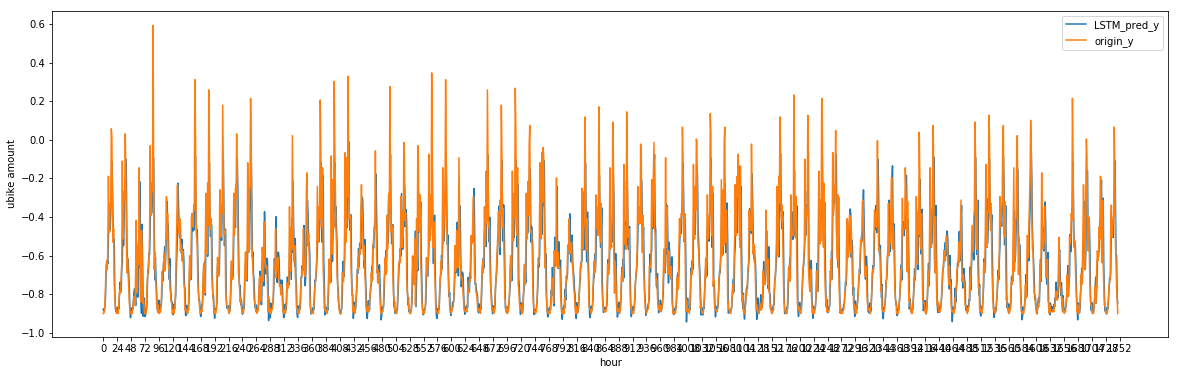

None
(8732, 5, 1)
1748/1748 [==============================] - 1s 716us/step
(1748,)


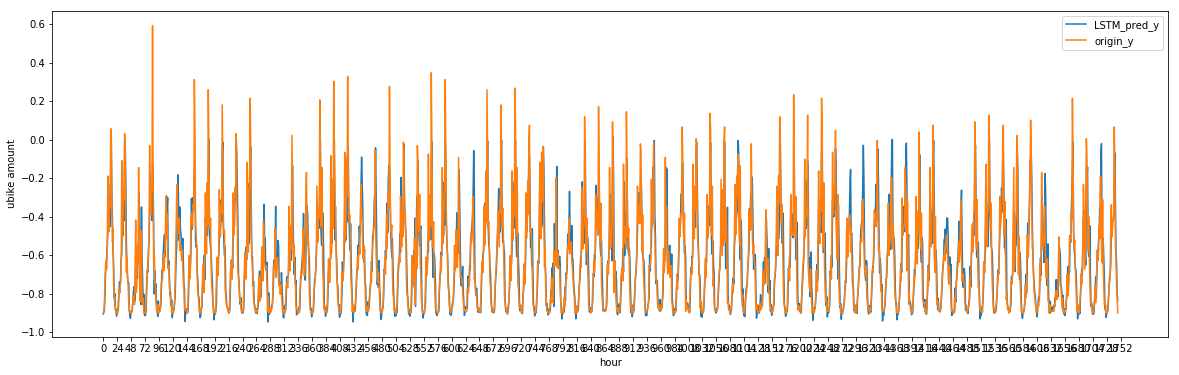

None
(8731, 6, 1)
1747/1747 [==============================] - 1s 691us/step
(1747,)


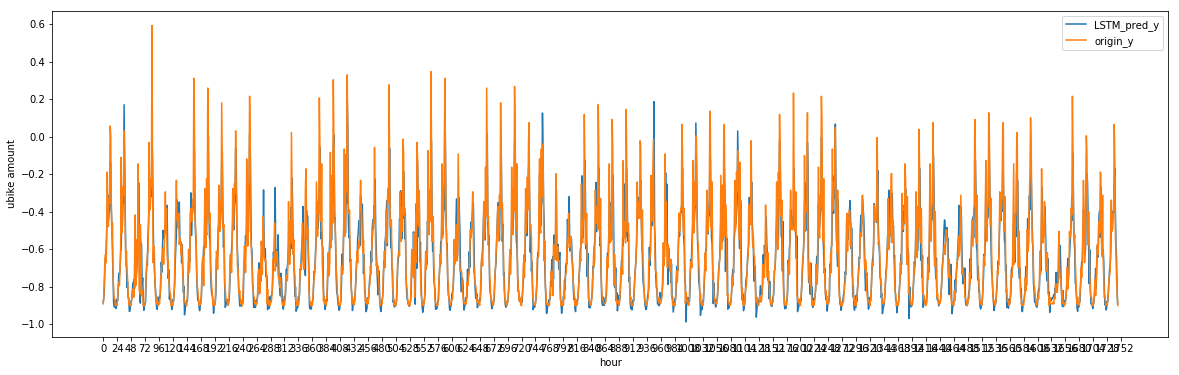

None
(8730, 7, 1)
1746/1746 [==============================] - 1s 654us/step
(1746,)


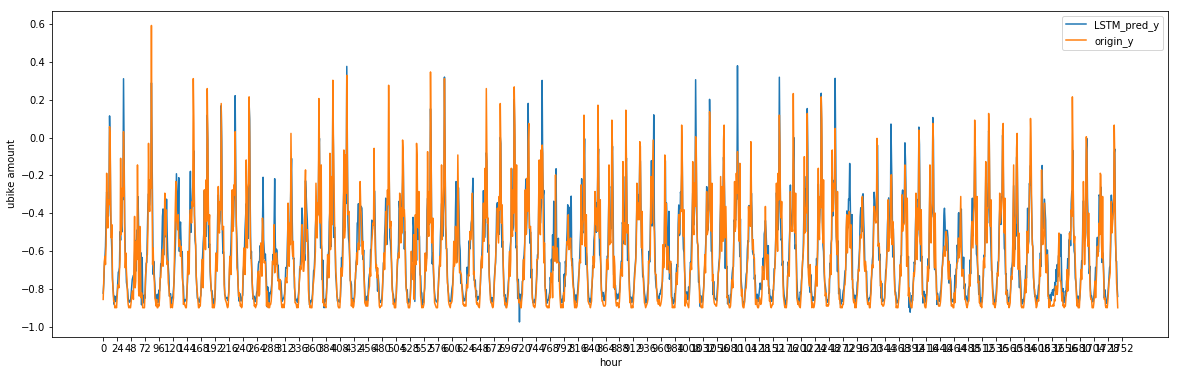

None


In [33]:
with_inputrain_mse_list = []
with_inputrain_y_pred_list = []
name_count = 0
for i in df_list:
    name_count+=1
    temp = []
    for j in i:
        temp.append(j)
    temp.pop(-1)

    X_rnn = np.array(i[temp]).reshape(len(i), len(temp), 1)
    y_rnn = np.array(i.Y).reshape(len(i), 1)
    
    print(X_rnn.shape)
    
    model = Sequential()
    model.add(LSTM(units=20, input_shape=(None,1)))
    model.add(Dense(1))
    model.load_weights('new version/with_rain_input_model_' + str(name_count) + '_all_day.h5')
    model.compile(loss='mse', optimizer='adam')
    mse = model.evaluate(X_rnn[6984:],y_rnn[6984:])
    with_inputrain_mse_list.append(mse)
    y_pred_lstm = model.predict(X_rnn[6984:]).reshape(-1)
    with_inputrain_y_pred_list.append(y_pred_lstm)
    print(y_pred_lstm.shape)
    plt.figure(figsize=(20,6))
    plt.xticks(range(0,1753,24))
    plt.xlabel('hour')
    plt.ylabel('ubike amount')
    plt.plot(y_pred_lstm, label='LSTM_pred_y')
    plt.plot(y_rnn[6984:], label='origin_y')
    plt.legend()
    print(plt.show())
    

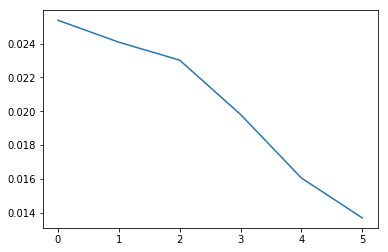

In [34]:
plt.plot(range(1,7),with_inputrain_mse_list,label='mse')
plt.xlabel('n=?')
plt.ylabel('MSE')
plt.legend()
plt.title('With Rain Input Model')

In [35]:
df_rnn1 = pd.DataFrame(columns=['X1','Y'])
df_rnn2 = pd.DataFrame(columns=['X1','X2','Y'])
df_rnn3 = pd.DataFrame(columns=['X1','X2','X3','Y'])
df_rnn4 = pd.DataFrame(columns=['X1','X2','X3','X4','Y'])
df_rnn5 = pd.DataFrame(columns=['X1','X2','X3','X4','X5','Y'])
df_rnn6 = pd.DataFrame(columns=['X1','X2','X3','X4','X5','X6','Y'])

for i in range(len(df_ubike)-1):
    df_rnn1.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn1.loc[i,'Y'] = np.asscalar(df_ubike_std[i+1])

for i in range(len(df_ubike)-2):
    df_rnn2.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn2.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn2.loc[i,'Y'] = np.asscalar(df_ubike_std[i+2])

for i in range(len(df_ubike)-3):
    df_rnn3.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn3.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn3.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn3.loc[i,'Y'] = np.asscalar(df_ubike_std[i+3])

for i in range(len(df_ubike)-4):
    df_rnn4.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn4.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn4.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn4.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn4.loc[i,'Y'] = np.asscalar(df_ubike_std[i+4])

for i in range(len(df_ubike)-5):
    df_rnn5.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn5.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn5.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn5.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn5.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn5.loc[i,'Y'] = np.asscalar(df_ubike_std[i+5])

for i in range(len(df_ubike)-6):
    df_rnn6.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn6.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn6.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn6.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn6.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn6.loc[i,'X6'] = np.asscalar(df_ubike_std[i+5])
    df_rnn6.loc[i,'Y'] = np.asscalar(df_ubike_std[i+6])
    
df_list = [df_rnn1,df_rnn2,df_rnn3,df_rnn4,df_rnn5,df_rnn6]

(8735, 1, 1)
1751/1751 [==============================] - 1s 651us/step
(1751,)


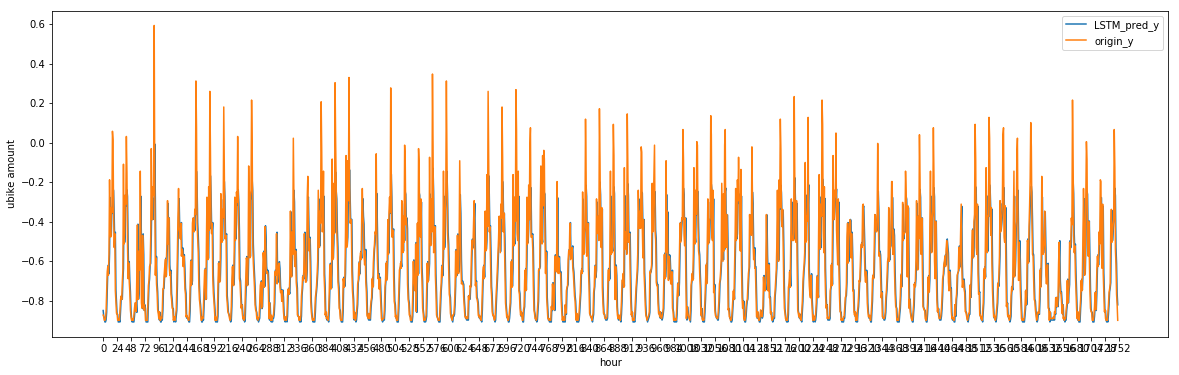

None
(8734, 2, 1)
1750/1750 [==============================] - 1s 653us/step
(1750,)


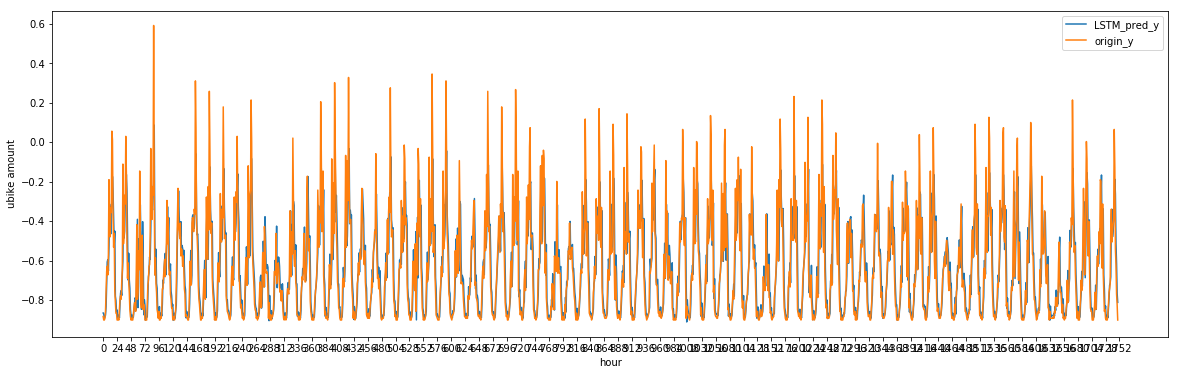

None
(8733, 3, 1)
1749/1749 [==============================] - 1s 649us/step
(1749,)


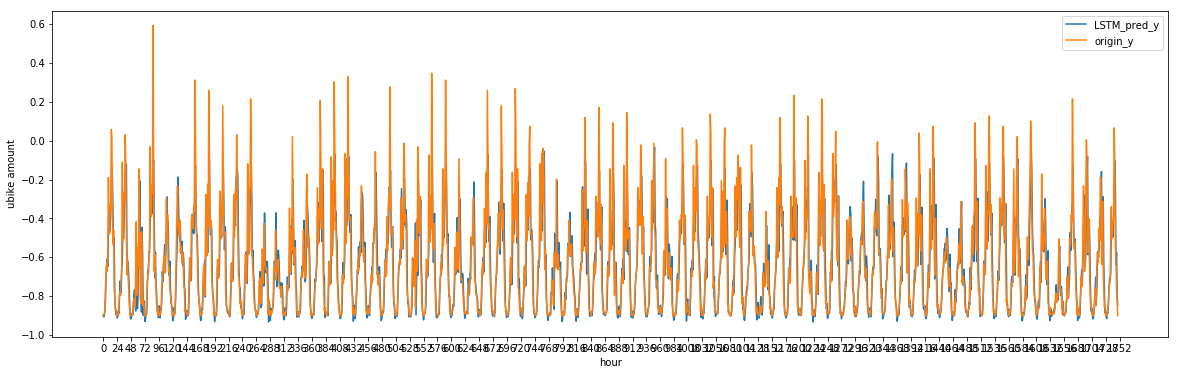

None
(8732, 4, 1)
1748/1748 [==============================] - 1s 661us/step
(1748,)


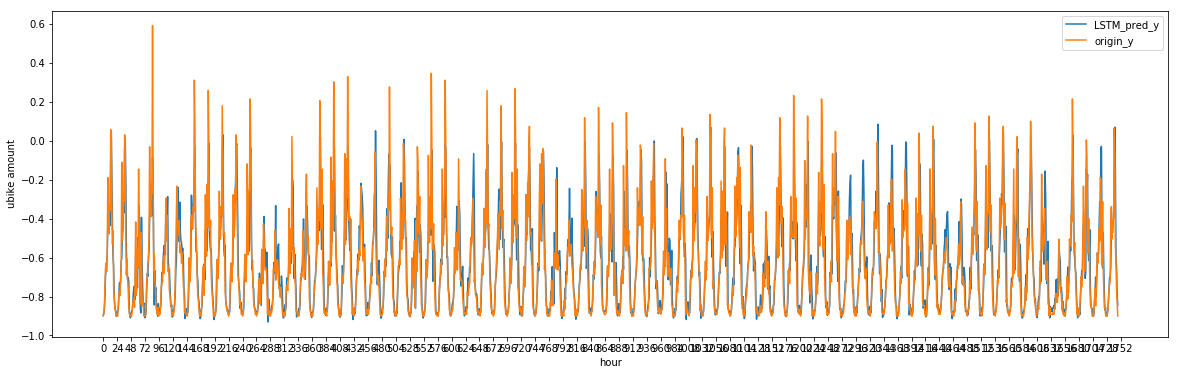

None
(8731, 5, 1)
1747/1747 [==============================] - 1s 670us/step
(1747,)


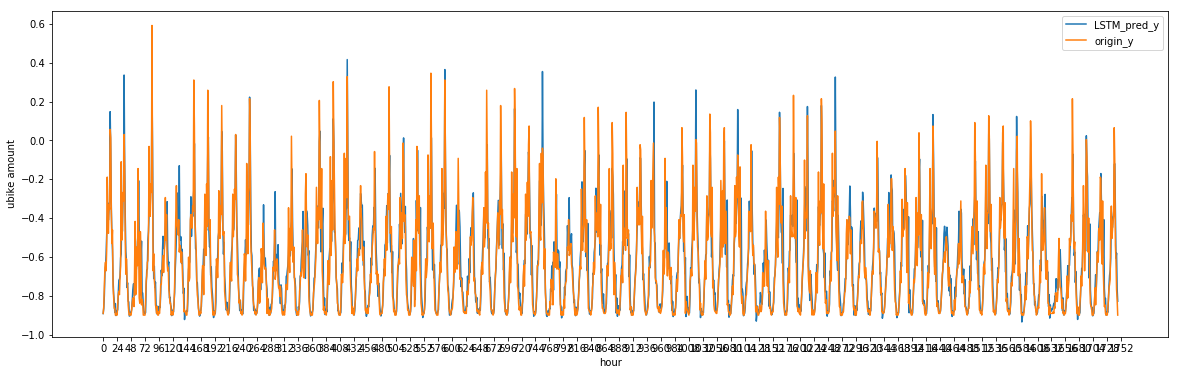

None
(8730, 6, 1)
1746/1746 [==============================] - 1s 682us/step
(1746,)


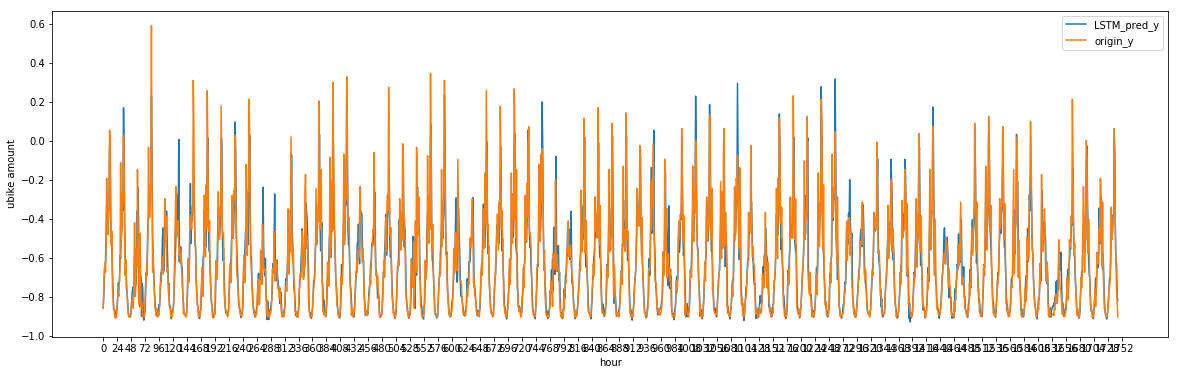

None


In [36]:
without_inputrain_mse_list = []
without_inputrain_y_pred_list = []
name_count = 0
for i in df_list:
    name_count+=1
    temp = []
    for j in i:
        temp.append(j)
    temp.pop(-1)

    X_rnn = np.array(i[temp]).reshape(len(i), len(temp), 1)
    y_rnn = np.array(i.Y).reshape(len(i), 1)
    
    print(X_rnn.shape)
    
    model = Sequential()
    model.add(LSTM(units=20, input_shape=(None,1)))
    model.add(Dense(1))
    model.load_weights('new version/no_rain_input_model_' + str(name_count) + '_all_day.h5')
    model.compile(loss='mse', optimizer='adam')
    mse = model.evaluate(X_rnn[6984:],y_rnn[6984:])
    without_inputrain_mse_list.append(mse)
    y_pred_lstm = model.predict(X_rnn[6984:]).reshape(-1)
    without_inputrain_y_pred_list.append(y_pred_lstm)
    print(y_pred_lstm.shape)
    plt.figure(figsize=(20,6))
    plt.xticks(range(0,1753,24))
    plt.xlabel('hour')
    plt.ylabel('ubike amount')
    plt.plot(y_pred_lstm, label='LSTM_pred_y')
    plt.plot(y_rnn[6984:], label='origin_y')
    plt.legend()
    print(plt.show())

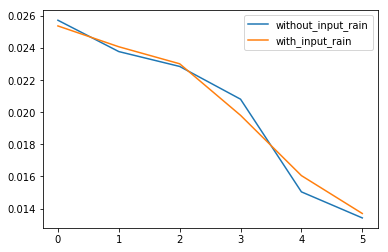

In [37]:
plt.plot(range(1,7),without_inputrain_mse_list,label='without_input_rain')
plt.plot(range(1,7),with_inputrain_mse_list,label='with_input_rain')
plt.xlabel('n=?')
plt.ylabel('MSE')
plt.legend()